In [1]:
%matplotlib inline
import sys
sys.path.append('/home/rohan/Cloud/Python/spectra/')
import spectra as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Set spacing
spacing = 0.54  # cm
crossed = True  # if peaks are crossed

In [2]:
!ls ../sample_data/

04_04_09_08_16_01      04_04_10_08_16_04      04_05_09_08_16_01
04_04_09_08_16_01.DAT  04_04_10_08_16_04.DAT  04_05_09_08_16_01.DAT
04_04_10_08_16_02      04_04_10_08_16_05      04_06_09_08_16_01
04_04_10_08_16_02.DAT  04_04_10_08_16_05.DAT  04_06_09_08_16_01.DAT
04_04_10_08_16_03      04_04_10_08_16_06      04_06_09_08_16_02
04_04_10_08_16_03.DAT  04_04_10_08_16_06.DAT  04_06_09_08_16_02.DAT


In [3]:
def copy_range(x, y, xmin, xmax):
    r1 = np.argmin(np.abs(x-xmin))
    r2 = np.argmin(np.abs(x-xmax))
    # print r1,r2
    if r1 < r2:
        return x[r1:r2], y[r1:r2]
    elif r1 > r2:
        return x[r2:r1], y[r2:r1]
    else:
        print "Error, no subrange"
        return

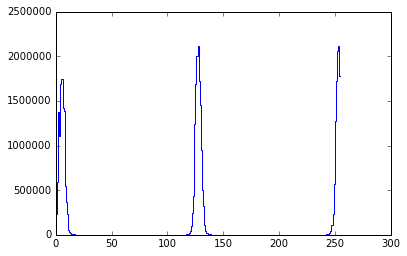

In [4]:
x = np.arange(256)
y = np.genfromtxt('../sample_data/04_06_09_08_16_01.DAT', skip_header=12)
plt.step(x, y)

In [5]:
fname = '04_04_09_08_16_01.DAT'

Loading file ... 
Peak width of about 7 (in x-data units)
Building model ... 
Peak 0: pos 4, height 1101154.0
Peak 1: pos 127, height 1997662.0
Peak 2: pos 253, height 2060752.0
Fitting Data...
[[Model]]
    (((Model(polynomial, prefix='bg_') + Model(lorentzian, prefix='p0_')) + Model(lorentzian, prefix='p1_')) + Model(lorentzian, prefix='p2_'))
[[Fit Statistics]]
    # function evals   = 91
    # data points      = 256
    # variables        = 10
    chi-square         = 1576967227534.805
    reduced chi-square = 6410435884.288
    Akaike info crit   = 5800.785
    Bayesian info crit = 5836.237
[[Variables]]
    bg_c0:         -32603.9515 +/- 5.79e+03 (17.75%) (init= 0)
    p0_sigma:       2.69810014 +/- 0.122292 (4.53%) (init= 3.5)
    p0_center:      5.62479952 +/- 0.080772 (1.44%) (init= 4)
    p0_amplitude:   1.5662e+07 +/- 5.16e+05 (3.29%) (init= 1.210782e+07)
    p1_sigma:       2.39629196 +/- 0.089209 (3.72%) (init= 3.5)
    p1_center:      127.752390 +/- 0.060935 (0.05%) (init

(0, 255)

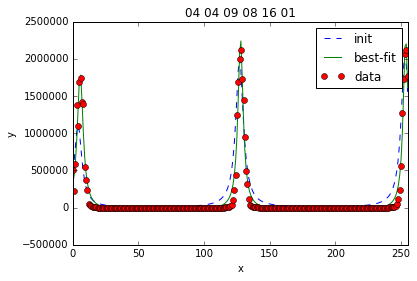

In [6]:
# fit the main peaks first
l = sp.Spectra(x, y)
l.peak_pos = [4, 127, 253]
l.num_peaks = 3
l.build_model(bg_ord=0)
l.fit_data()
l.output_results()
l.out.plot_fit()
plt.title(fname.replace('_', ' ').title()[:-4])
plt.xlim(min(l.x), max(l.x))

Loading file ... 
Peak width of about 1 (in x-data units)
Looking for peaks ... 
Found 7 peaks at [1, 16, 24, 39, 52, 73, 87]
After filtering out peaks below  0 percent, we have  7  peaks.
Using  4  peaks at  [1, 39, 52, 87]


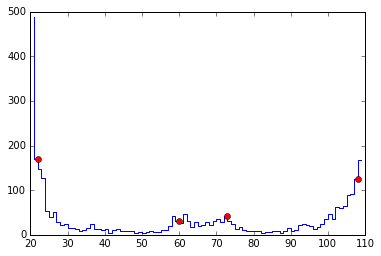

In [7]:
# extract inelastic ranges
b1x, b1y = copy_range(x, y, 21, 110)
b2x, b2y = copy_range(x, y, 146, 235)

# inelastic range 1
b1 = sp.Spectra(b1x, b1y)
b1.find_peaks(width=2, threshold=0, limit=4)

plt.step(b1x,b1y)
plt.plot(b1x[b1.peak_pos],b1y[b1.peak_pos], 'ro')

Building model ... 
Peak 0: pos 22, height 170.0
Peak 1: pos 60, height 30.0
Peak 2: pos 73, height 42.0
Peak 3: pos 108, height 124.0
Fitting Data...
[[Model]]
    ((((Model(polynomial, prefix='bg_') + Model(lorentzian, prefix='p0_')) + Model(lorentzian, prefix='p1_')) + Model(lorentzian, prefix='p2_')) + Model(lorentzian, prefix='p3_'))
[[Fit Statistics]]
    # function evals   = 375
    # data points      = 89
    # variables        = 13
    chi-square         = 7948.190
    reduced chi-square = 104.581
    Akaike info crit   = 439.847
    Bayesian info crit = 472.199
[[Variables]]
    bg_c0:          3.13015891 +/- 3.235295 (103.36%) (init= 0)
    p0_sigma:       0.50000000 +/- 5.089965 (1017.99%) (init= 1)
    p0_center:      19.0222838 +/- 0.970703 (5.10%) (init= 22)
    p0_amplitude:   12397.4765 +/- 6.43e+04 (518.63%) (init= 534.0708)
    p1_sigma:       2.97618673 +/- 1.224779 (41.15%) (init= 1)
    p1_center:      61.3579932 +/- 0.706428 (1.15%) (init= 60)
    p1_amplitude:  

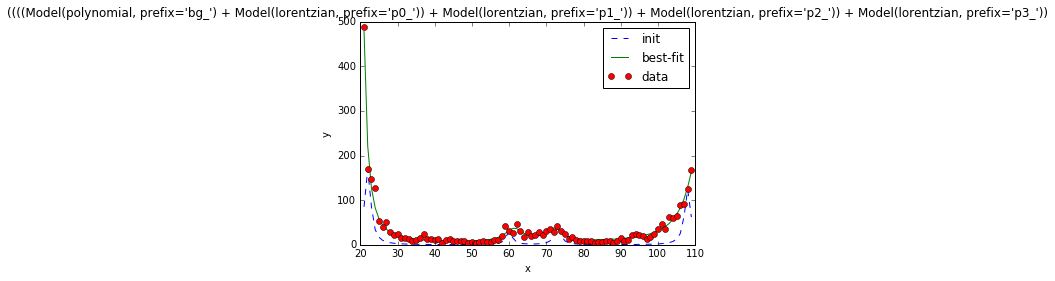

In [8]:
b1.build_model(bg_ord=0)
b1.fit_data()
b1.output_results()
b1.out.plot_fit()

In [14]:
dir(b2)

['__doc__',
 '__init__',
 '__module__',
 'amplitude',
 'build_model',
 'butter_lp_filter',
 'calibrate_x',
 'crop',
 'data_max',
 'data_max_pos',
 'filter_high_freq',
 'find_background',
 'find_fwhm',
 'find_peaks',
 'fit_data',
 'fwhm',
 'getxy',
 'guess_peak_width',
 'height',
 'num_peaks',
 'num_points',
 'output_results',
 'peak_pos',
 'print_peak_results',
 'reset',
 'set_peak_width',
 'smooth_data',
 'subtract_background',
 'test_peak_width',
 'x',
 'x_bak',
 'y',
 'y_bak',
 'y_smooth']

Loading file ... 
Peak width of about 2 (in x-data units)
Looking for peaks ... 
Found 6 peaks at [1, 21, 38, 51, 69, 85]
After filtering out peaks below  0 percent, we have  6  peaks.
Using  4  peaks at  [1, 38, 51, 85]


AttributeError: Spectra instance has no attribute 'out'

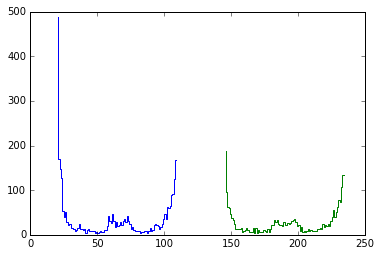

In [16]:
# inelastic range 2
b2 = sp.Spectra(b2x, b2y)
b2.smooth_data(window_size=5, order=3)
b2.find_peaks(width=5, threshold=0, limit=4, smooth=True)

Building model ... 
Peak 0: pos 147, height 96.0
Peak 1: pos 184, height 29.0
Peak 2: pos 197, height 33.0
Peak 3: pos 231, height 78.0
Fitting Data...
[[Model]]
    ((((Model(polynomial, prefix='bg_') + Model(lorentzian, prefix='p0_')) + Model(lorentzian, prefix='p1_')) + Model(lorentzian, prefix='p2_')) + Model(lorentzian, prefix='p3_'))
[[Fit Statistics]]
    # function evals   = 2094
    # data points      = 89
    # variables        = 13
    chi-square         = 2105.139
    reduced chi-square = 27.699
    Akaike info crit   = 321.605
    Bayesian info crit = 353.957
[[Variables]]
    bg_c0:          1.60424609 +/- 2.450569 (152.76%) (init= 0)
    p0_sigma:       1.25000004 +/- 3.668517 (293.48%) (init= 2.5)
    p0_center:      143.042751 +/- 1.687065 (1.18%) (init= 147)
    p0_amplitude:   4614.00558 +/- 1.04e+04 (225.81%) (init= 753.9822)
    p1_sigma:       3.62201115 +/- 0.911925 (25.18%) (init= 2.5)
    p1_center:      184.513260 +/- 0.498589 (0.27%) (init= 184)
    p1_amplit

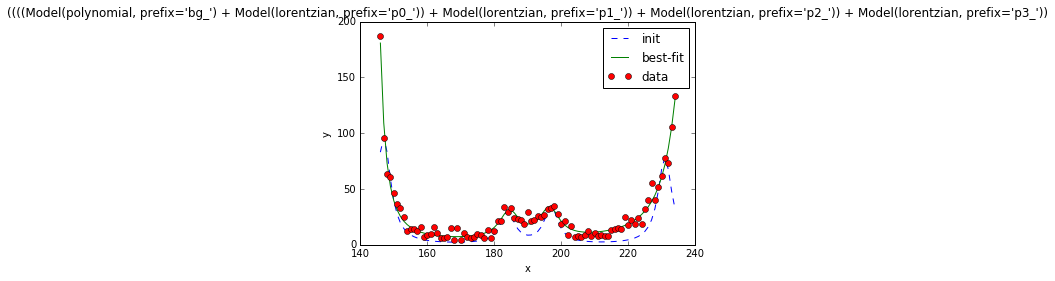

In [18]:
b2.build_model(bg_ord=0)
b2.fit_data()
b2.output_results()

b2.out.plot_fit()

#las = l.output_results(pandas=True)
#br1 = b1.output_results(pandas=True)  # should be sorted?
#br2 = b2.output_results(pandas=True)

([<matplotlib.axis.YTick at 0x7fa81c5d3fd0>,
 <a list of 4 Text yticklabel objects>)

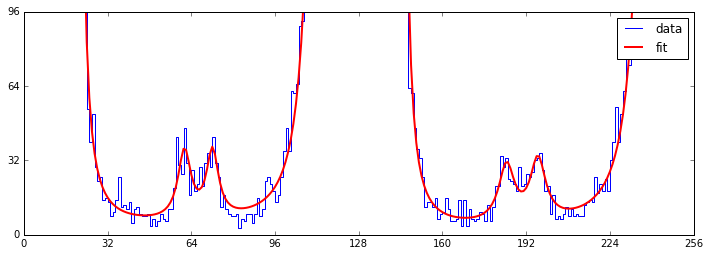

In [52]:
fig, ax = plt.subplots(figsize=(12,4))
plt.step(b1x,b1y,'b')
plt.step(b2x,b2y,'b', label='data')
plt.plot(b1x,b1.out.best_fit,'r', lw=2)
plt.plot(b2x,b2.out.best_fit,'r', lw=2, label='fit')
#for i in [4, 127, 253]:
#    plt.axvline(i, color='gray', lw=5)
plt.xlim(0,256)
plt.ylim(0,96)
plt.legend()
plt.xticks(np.arange(0,257,32))
plt.yticks(np.arange(0,127,32))

In [11]:
# import files from directory
fol_name = os.path.abspath('../sample_data/')

for f in os.listdir(fol_name):
    if f.endswith('.DAT'):
        # full file name
        full_name = os.path.join(fol_name, f)
        
        # remove extenstion
        base_name = file.split('.')[0]
        
        # make sub folder
        sub_path = os.path.join(fol_name, base_name)
        if not os.path.exists(sub_path):
            os.makedirs(sub_path)

NameError: name 'os' is not defined

In [ ]:

# Gui section
# note need to use Tk as matplotlib backend or crashes

Tk().withdraw()  # don't need full GUI, keep the root window from appearing
# folname = os.path.abspath(os.path.join(os.path.dirname(__file__), 'data'))
folname = askdirectory(title='Please select dir')

# redirect output to log file
# sys.stdout = open(folname + '/output.txt', 'w')
wfil = open(folname + '/output.csv', 'w')
for f in os.listdir(folname):
    fname = folname + '/' + f
    if os.path.isdir(fname):
        continue
    if not (f.endswith('DAT')):
        continue
    # create a subfolder for all output
    bdir, fil = os.path.split(fname)
    filx = fil.split('.')[0]
    ndir = bdir + '/' + filx + '/'
    if not os.path.exists(ndir):
        os.makedirs(ndir)

    # redirect all console out to log file
    sys.stdout = open(ndir + 'output.txt', 'w')
    print(fname)

    # get data
    x = np.arange(256)
    y = np.genfromtxt(fname, skip_header=12)

    # extract inelastic ranges
    b1x, b1y = af.copy_range(x, y, 21, 110)
    b2x, b2y = af.copy_range(x, y, 146, 235)

    # fit elastic data assuming laser peak positions
    l = sp.Spectra(x, y)
    l.peak_pos = [4, 127, 253]
    l.num_peaks = 3
    l.build_model(bg_ord=0)
    l.fit_data()
    l.output_results()

    plotfit(l, ndir, 'elastic_fit.pdf')

    # inelastic range 1
    b1 = sp.Spectra(b1x, b1y)
    b1.find_peaks(width=5, threshold=20, limit=4)
    b1.build_model(bg_ord=0)
    b1.fit_data()
    b1.output_results()

    plotfit(b1, ndir, 'inelastic1_fit.pdf')

    # inelastic range 2
    b2 = sp.Spectra(b2x, b2y)
    b2.find_peaks(width=5, threshold=20, limit=4)
    b2.build_model(bg_ord=0)
    b2.fit_data()
    b2.output_results()

    plotfit(b2, ndir, 'inelastic2_fit.pdf')

    las = l.output_results(pandas=True)
    br1 = b1.output_results(pandas=True)  # should be sorted?
    br2 = b2.output_results(pandas=True)

    def oc(obj, peak):
        """Return center of peak in object"""
        return obj.loc['p%s_center' % peak, 'value']

    # note all br fits have 4 peaks, only 2 center are relevant
    # differences between laser and brillouin peaks
    if crossed:
        # (l_0) b1_1 b1_2 (l_1) b2_1 b2_2 (l_2)
        sh = [
              oc(br1, 2) - oc(las, 0),
              oc(las, 1) - oc(br1, 1),
              oc(br2, 2) - oc(las, 1),
              oc(las, 2) - oc(br2, 1)
        ]
    else:
        # (l_0) b1_1 b1_2 (l_1) b2_1 b2_2 (l_2)
        sh = [
              oc(br1, 1) - oc(las, 0),
              oc(las, 1) - oc(br1, 2),
              oc(br2, 1) - oc(las, 1),
              oc(las, 2) - oc(br2, 2)
        ]

    fsr = 1.0 / (2.0 * spacing)
    freqsh = [(fsr / 256.0) * (s) for s in sh]
    freqs = [str(s) for s in freqsh]
    wfil.write(f + ',')  # filename
    wfil.write(",".join(freqs))  # frequencies
    wfil.write('\n')
    # print freqsh
    l.output_results()
    b1.output_results()
    b2.output_results()

wfil.close()
